In [3]:
import cv2
import matplotlib.pyplot as plt

import util

file1 = "./vid/VID_20230929_200627.mp4"
file2 = "./vid/short-sample4.mp4"
file3 = "./vid/short-sample3.mp4"
file4 = "./vid/IMG_8020.mp4"

frames = cv2.VideoCapture(file2)

frame_rate = util.getFPS(frames)
number_of_frames = util.getNumberOfFrames(frames)
frame_rate_new = 3  # number of frames to select every second
selected_frame_index = int(frame_rate / frame_rate_new)  # pick every nth frame

print(
    "frame rate",
    frame_rate,
    "\nnumber of frames",
    number_of_frames,
    "\nselected frame index",
    selected_frame_index,
)

selected_frames = []  # list of selected frames by reduced framerate
difference_array = []  # array to store difference values
selected_values = []

image_compare_displacement = 15  # the distance between the compared images by index
difference_threshold = 6.0  # pick frames where the difference is less than this

frames_array = [] 

counter = 0  # frame index
while counter < 3900:
    _, frame = frames.read()
    frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    # cv2.imshow('frame', frame)

    selected_frames.append(frame)
    # print("added frame", counter)

    counter += 1

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()


frame rate 30.0 
number of frames 3399.0 
selected frame index 10


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


12.07576388888889
6.314899691358025


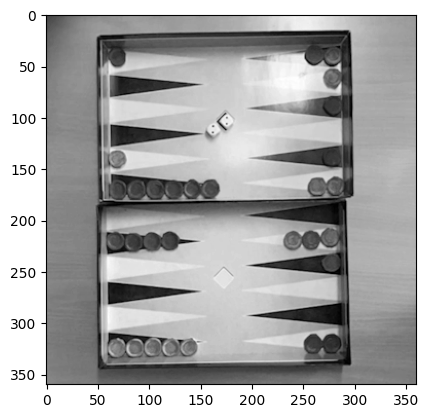

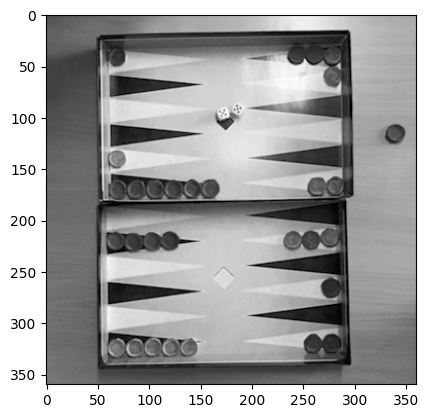

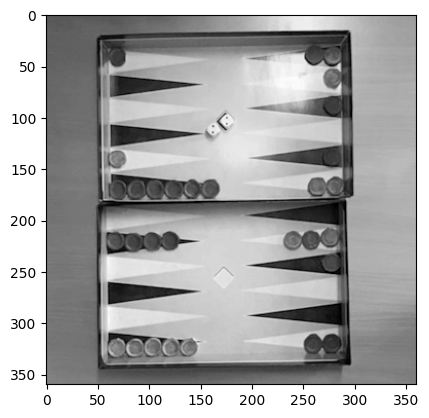

In [11]:
f1 = selected_frames[750]
f2 = selected_frames[-1]

f3 = selected_frames[700]

f1 = cv2.cvtColor(f1, cv2.COLOR_BGR2GRAY)
f2 = cv2.cvtColor(f2, cv2.COLOR_BGR2GRAY)
f3 = cv2.cvtColor(f3, cv2.COLOR_BGR2GRAY)

plt.imshow(f1, cmap="gray")
plt.figure()
plt.imshow(f2, cmap="gray")
plt.figure()
plt.imshow(f3, cmap="gray")

diff = cv2.absdiff(f1, f2)
diff = cv2.mean(diff)[0]

print(diff)

diff2 = cv2.absdiff(f1, f3)
diff2 = cv2.mean(diff2)[0]

print(diff2)